In [3]:
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.0 (2022-06-28 03:20:05 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [4]:
packages <- c("googledrive")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))  
}

In [5]:
library("googledrive")

In [6]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1ARtbsJqCoVyzWMEg-LkDFLhNZ7iv5LFSRmaRMzVuYiYLiJcuiT__zLHnx1c


In [7]:
file = drive_get("~/ML/music_genre.csv")





✔ The input `path` resolved to exactly 1 file.



In [8]:
drive_download(file)

File downloaded:

• music_genre.csv <id: 1PqAN6ydUg5IBNzAEgxdYErlGJEnuF428>

Saved locally as:

• music_genre.csv



In [9]:
#installing required packages
install.packages("stringi")
install.packages("ggcorrplot")
install.packages("mltools")
install.packages("caret")
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
install.packages("vcd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
#Adding the required libraries
library(tidyverse)
library (stringi)
library(ggplot2)
library(tidyr)
library(ggcorrplot)
library(mltools)
library(data.table)
library(caret)
library(dplyr)
library(randomForest)
library(vcd)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks R.utils::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘

In [13]:
data = read.csv("/content/music_genre.csv")

In [14]:
head(data)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,32894,Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
2,46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
3,30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
4,62177,Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
5,24907,What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
6,89064,Axel Boman,Hello,47,0.00523,0.755,519468,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic


In [15]:
dim(data)

[1] 50005    18

In [16]:
colnames(data)

[1] "instance_id"      "artist_name"      "track_name"       "popularity"      
 [5] "acousticness"     "danceability"     "duration_ms"      "energy"          
 [9] "instrumentalness" "key"              "liveness"         "loudness"        
[13] "mode"             "speechiness"      "tempo"            "obtained_date"   
[17] "valence"          "music_genre"

In [17]:
str(data)

'data.frame':	50005 obs. of  18 variables:
 $ instance_id     : num  32894 46652 30097 62177 24907 ...
 $ artist_name     : chr  "Röyksopp" "Thievery Corporation" "Dillon Francis" "Dubloadz" ...
 $ track_name      : chr  "Röyksopp's Night Out" "The Shining Path" "Hurricane" "Nitro" ...
 $ popularity      : num  27 31 28 34 32 47 46 43 39 22 ...
 $ acousticness    : num  0.00468 0.0127 0.00306 0.0254 0.00465 ...
 $ danceability    : num  0.652 0.622 0.62 0.774 0.638 0.755 0.572 0.809 0.509 0.578 ...
 $ duration_ms     : num  -1 218293 215613 166875 222369 ...
 $ energy          : num  0.941 0.89 0.755 0.7 0.587 0.731 0.803 0.706 0.921 0.731 ...
 $ instrumentalness: num  7.92e-01 9.50e-01 1.18e-02 2.53e-03 9.09e-01 8.54e-01 7.74e-06 9.03e-01 2.76e-04 1.12e-02 ...
 $ key             : chr  "A#" "D" "G#" "C#" ...
 $ liveness        : num  0.115 0.124 0.534 0.157 0.157 0.216 0.106 0.0635 0.178 0.111 ...
 $ loudness        : num  -5.2 -7.04 -4.62 -4.5 -6.27 ...
 $ mode            : chr  "Min

In [18]:
summary(data)

  instance_id    artist_name         track_name          popularity   
 Min.   :20002   Length:50005       Length:50005       Min.   : 0.00  
 1st Qu.:37974   Class :character   Class :character   1st Qu.:34.00  
 Median :55914   Mode  :character   Mode  :character   Median :45.00  
 Mean   :55888                                         Mean   :44.22  
 3rd Qu.:73863                                         3rd Qu.:56.00  
 Max.   :91759                                         Max.   :99.00  
 NA's   :5                                             NA's   :5      
  acousticness     danceability     duration_ms          energy        
 Min.   :0.0000   Min.   :0.0596   Min.   :     -1   Min.   :0.000792  
 1st Qu.:0.0200   1st Qu.:0.4420   1st Qu.: 174800   1st Qu.:0.433000  
 Median :0.1440   Median :0.5680   Median : 219281   Median :0.643000  
 Mean   :0.3064   Mean   :0.5582   Mean   : 221253   Mean   :0.599755  
 3rd Qu.:0.5520   3rd Qu.:0.6870   3rd Qu.: 268612   3rd Qu.:0.815000  


**Removing the duplicates**

In [19]:
which(duplicated(data))


[1] 10002 10003 10004 10005

In [20]:
data = data %>% distinct()

In [21]:
dim(data)

[1] 50001    18

**Checking for null values**

In [22]:
data %>% 
  summarise_all(~sum(is.na(.)))

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,1,1,1,1,1,0,1,1,0,1,0,0,1,0


In [23]:
data = data %>% drop_na()    #Dropping the rows with null values as there few

In [24]:
data %>% 
  summarise_all(~sum(is.na(.)))

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
dim(data)

[1] 50000    18

In [26]:
n_distinct(data$music_genre)

[1] 10

**Handling string inconsistencies**

In [27]:
unique(data$mode)   #No inconsistencies found

[1] "Minor" "Major"

In [28]:
unique(data$key)

[1] "A#" "D"  "G#" "C#" "F#" "B"  "G"  "F"  "A"  "C"  "E"  "D#"

In [29]:
unique(data$music_genre)

[1] "Electronic"  "Anime"       "Jazz"        "Alternative" "Country"    
 [6] "Rap"         "Blues"       "Rock"        "Classical"   "Hip-Hop"

In [31]:
n_distinct(data$artist_name)

[1] 6863

In [30]:
unique(data$artist_name)

[1] "Röyksopp"                                            
   [2] "Thievery Corporation"                                
   [3] "Dillon Francis"                                      
   [4] "Dubloadz"                                            
   [5] "What So Not"                                         
   [6] "Axel Boman"                                          
   [7] "Jordan Comolli"                                      
   [8] "Hraach"                                              
   [9] "Kayzo"                                               
  [10] "Shlump"                                              
  [11] "Chase & Status"                                      
  [12] "G Jones"                                             
  [13] "Champagne Drip"                                      
  [14] "DJ Shadow"                                           
  [15] "Getter"                                              
  [16] "Excision"                                            
  [17] "San Holo"                                            
  [18] "The Bloody Beetroots"                                
  [19] "empty_field"                                         
  [20] "Alison Wonderland"                                   
  [21] "RJD2"                                                
  [22] "Massive Attack"                                      
  [23] "The Prodigy"                                         
  [24] "Fatboy Slim"                                         
  [25] "Barely Alive"                                        
  [26] "Daniel Avery"                                        
  [27] "Boombox Cartel"                                      
  [28] "Big Gigantic"                                        
  [29] "Jon Hopkins"                                         
  [30] "PEEKABOO"                                            
  [31] "Portishead"                                          
  [32] "Fabian Mazur"                                        
  [33] "Wax Tailor"                                          
  [34] "The Crystal Method"                                  
  [35] "Air"                                                 
  [36] "Dahu"                                                
  [37] "The Presets"                                         
  [38] "UNKLE"                                               
  [39] "Digitalism"                                          
  [40] "!!!"                                                 
  [41] "Boogie T"                                            
  [42] "JOYRYDE"                                             
  [43] "Ottawan"                                             
  [44] "Bonobo"                                              
  [45] "Tangerine Dream"                                     
  [46] "Tomáš Dvořák"                                        
  [47] "Justice"                                             
  [48] "GusGus"                                              
  [49] "Dion Timmer"                                         
  [50] "HNNY"                                                
  [51] "TNGHT"                                               
  [52] "Kill The Noise"                                      
  [53] "Floex"                                               
  [54] "Bent"                                                
  [55] "Weval"                                               
  [56] "SVDDEN DEATH"                                        
  [57] "Flux Pavilion"                                       
  [58] "New Order"                                           
  [59] "Moby"                                                
  [60] "UMEK"                                                
  [61] "Trentemøller"                                        
  [62] "Sofa Surfers"                                        
  [63] "Jauz"                                                
  [64] "The Chemical Brothers"                               
  [65] "Virtual Riot"              

**Handling faulty data types**

In [32]:
count = sum(stri_count(data$tempo,regex='[^0-9.]'))  #count of non-numeric rows in tempo
count

[1] 4980

In [33]:
data$tempo <- as.numeric(as.character(data$tempo)) #converting char to numeric

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [34]:
data %>% 
  summarise_all(~sum(is.na(.)))     #The non-numeric values converted to NA    

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,4980,0,0,0


In [35]:
sum(is.na(data$tempo))

[1] 4980

**Checking for class imbalance**

In [36]:
 target = table(data$music_genre)  
 target


Alternative       Anime       Blues   Classical     Country  Electronic 
       5000        5000        5000        5000        5000        5000 
    Hip-Hop        Jazz         Rap        Rock 
       5000        5000        5000        5000 

In [37]:
target_label = names(target)
target_count = as.numeric(target)
target_label
target_count

[1] "Alternative" "Anime"       "Blues"       "Classical"   "Country"    
 [6] "Electronic"  "Hip-Hop"     "Jazz"        "Rap"         "Rock"

[1] 5000 5000 5000 5000 5000 5000 5000 5000 5000 5000

In [38]:
trgt_df = data.frame(label= c(target_label), count= c(target_count))

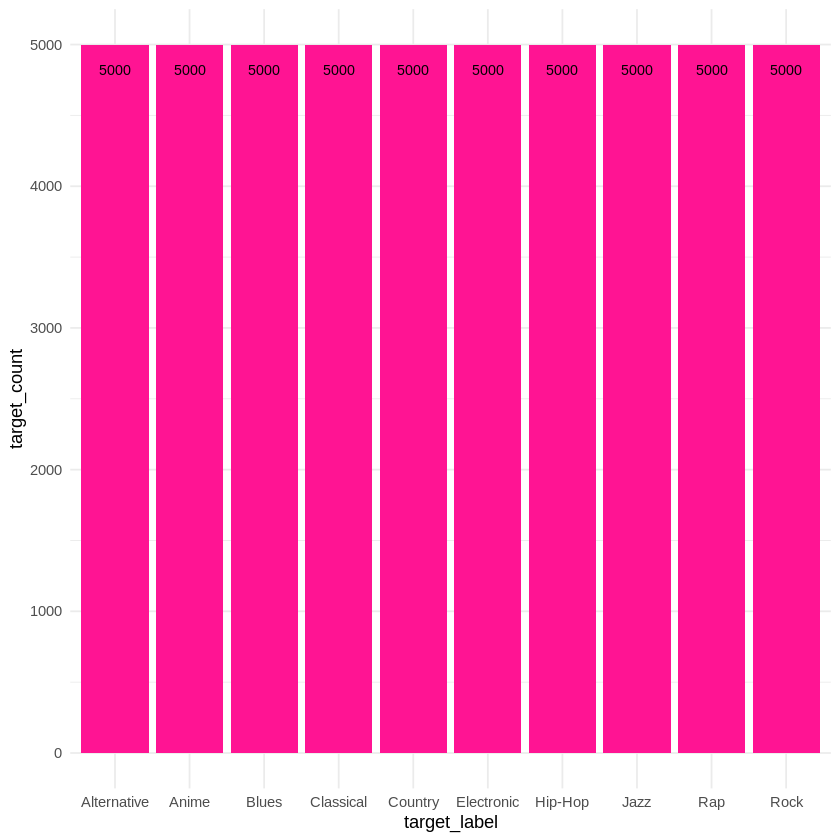

In [39]:
ggplot(data=trgt_df, aes(x=target_label, y=target_count)) +
  geom_bar(stat="identity", fill="deeppink")+
  geom_text(aes(label=target_count), vjust=3, color="black", size=3)+
  theme_minimal()                                                             #no class imbalance

**Exploring with visualizations**

In [40]:
mode = table(data$mode)   
mode_df = data.frame(label= c(names(mode)), count= c(as.numeric(mode)))
mode_df

label,count
<chr>,<dbl>
Major,32099
Minor,17901


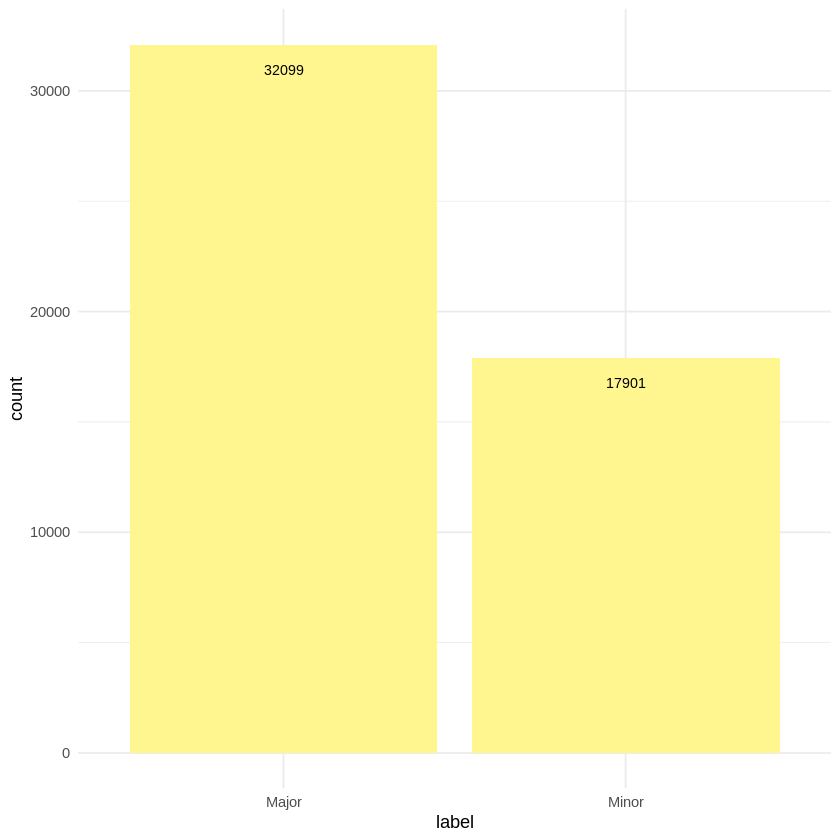

In [41]:
ggplot(data=mode_df, aes(x=label, y=count)) +
  geom_bar(stat="identity", fill="khaki1")+
  geom_text(aes(label=count), vjust=3, color="black", size=3)+
  theme_minimal()     

In [42]:
key = table(data$key)   
key_df = data.frame(label= c(names(key)), count= c(as.numeric(key)))
head(key_df)

,label,count
,<chr>,<dbl>
1,A,4825
2,A#,3356
3,B,3789
4,C,5522
5,C#,5405
6,D,5265


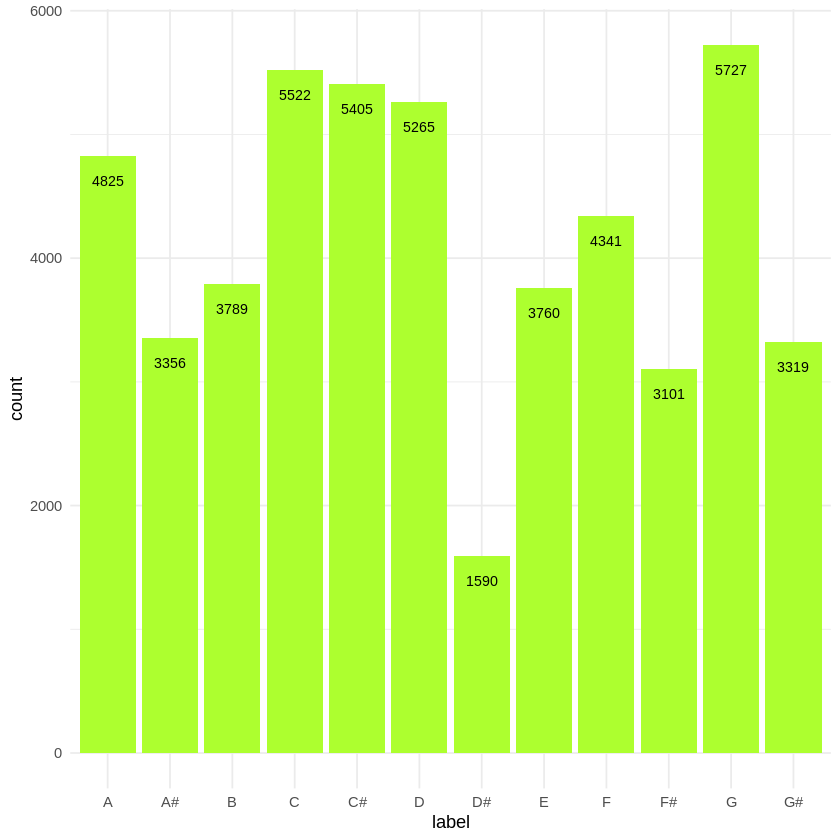

In [43]:
ggplot(data=key_df, aes(x=label, y=count)) +
  geom_bar(stat="identity", fill="greenyellow")+
  geom_text(aes(label=count), vjust=3, color="black", size=3)+
  theme_minimal()    

In [44]:
pop_df = data %>%
  group_by(music_genre) %>%
  summarise(mean_pop = mean(popularity))
pop_df

music_genre,mean_pop
<chr>,<dbl>
Alternative,50.2242
Anime,24.2716
Blues,34.8040
Classical,29.3158
Country,46.0100
Electronic,38.1118
Hip-Hop,58.3996
Jazz,40.9286
Rap,60.4974


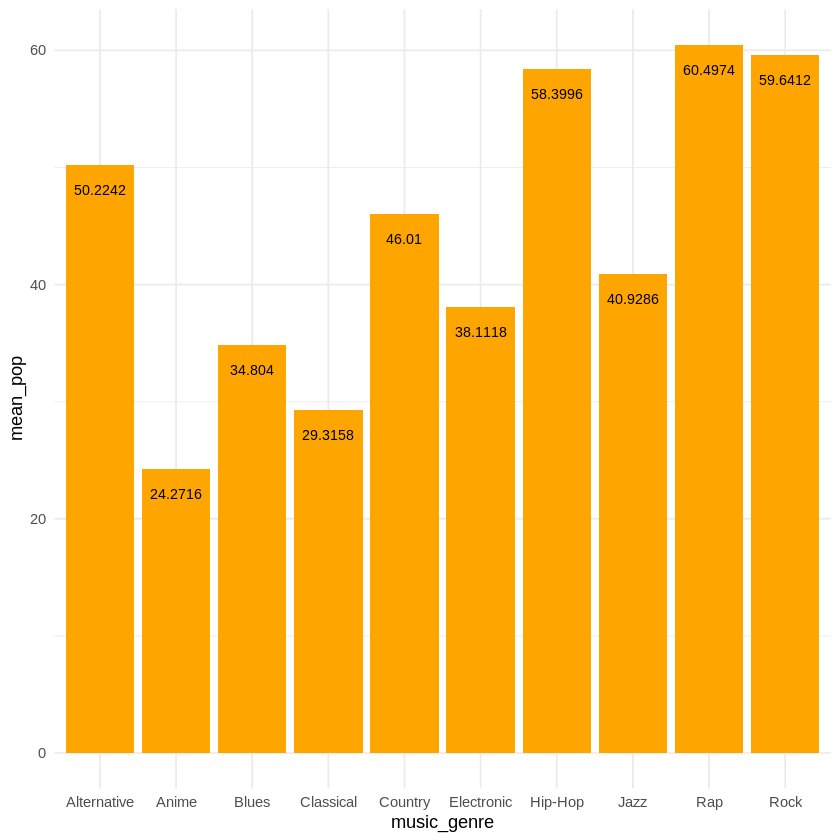

In [45]:
ggplot(data=pop_df, aes(x=music_genre, y=mean_pop)) +
  geom_bar(stat="identity", fill="orange")+
  geom_text(aes(label=mean_pop), vjust=3, color="black", size=3)+
  theme_minimal() 

In [46]:
artist_df = data %>%
  group_by(artist_name) %>%
  summarise(mean_pop = mean(popularity)) 

artist_df = artist_df[order(-artist_df$mean_pop),]

head(artist_df,10)

artist_name,mean_pop
<chr>,<dbl>
Duki,82.00000
Heuss L'enfoiré,81.00000
NSG,81.00000
Coolio,80.00000
Danny Ocean,80.00000
Ben E. King,79.00000
Snow Patrol,78.00000
Post Malone,77.23333
Cadet,77.00000


In [47]:
track_df = data %>%
  group_by(track_name) %>%
  summarise(mean_pop = mean(popularity)) 

track_df = track_df[order(-track_df$mean_pop),]

head(track_df,10)

track_name,mean_pop
<chr>,<dbl>
Wow.,99
Sunflower - Spider-Man: Into the Spider-Verse,97
MIDDLE CHILD,96
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",96
Adan y Eva,95
Going Bad (feat. Drake),95
SICKO MODE,94
a lot,93
SAD!,92


In [48]:
genre_track = data %>%
  group_by(music_genre,track_name) %>%
  summarise(mean_pop = mean(popularity))
head(genre_track,10)

`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


music_genre,track_name,mean_pop
<chr>,<chr>,<dbl>
Alternative,¿Qué Tiene?,58
Alternative,'Til the City's On Fire,40
Alternative,'Til We Die,50
Alternative,"""99""",62
Alternative,"""Blue Flame"" (Interlude)",7
Alternative,"""sometimes you meet the right people at the wrong times""",43
Alternative,(Joe Gets Kicked Out of School for Using) Drugs With Friends (But Says This Isn't a Problem),49
Alternative,(Not) The Love Of My Life,46
Alternative,@chl03k,40


In [49]:
top2 = genre_track[order(-genre_track$mean_pop),] %>% slice(1:2)
top2

music_genre,track_name,mean_pop
<chr>,<chr>,<dbl>
Alternative,Sanctuary,83
Alternative,SLOW DANCING IN THE DARK,81
Anime,Silhouette,65
Anime,Unravel,65
Blues,The Joker,74
Blues,Ain't No Rest for the Wicked,72
Classical,"Piano Concerto No. 21 in C Major, K. 467 ""Elvira Madigan"": II. Andante",68
Classical,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", Op. 27 No. 2: I. Adagio sostenuto",68
Country,Beautiful Crazy,82


**Histograms**

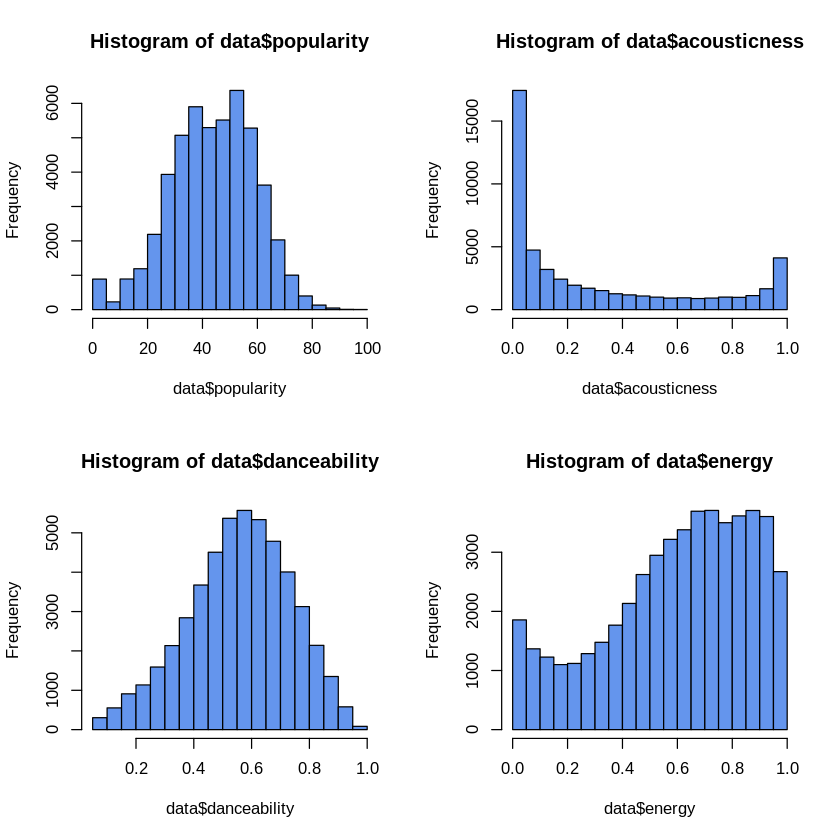

In [50]:
par(mfrow = c(2,2))
hist(data$popularity,col = "cornflowerblue")
hist(data$acousticness, col = "cornflowerblue")
hist(data$danceability, col = "cornflowerblue")
hist(data$energy, col = "cornflowerblue")

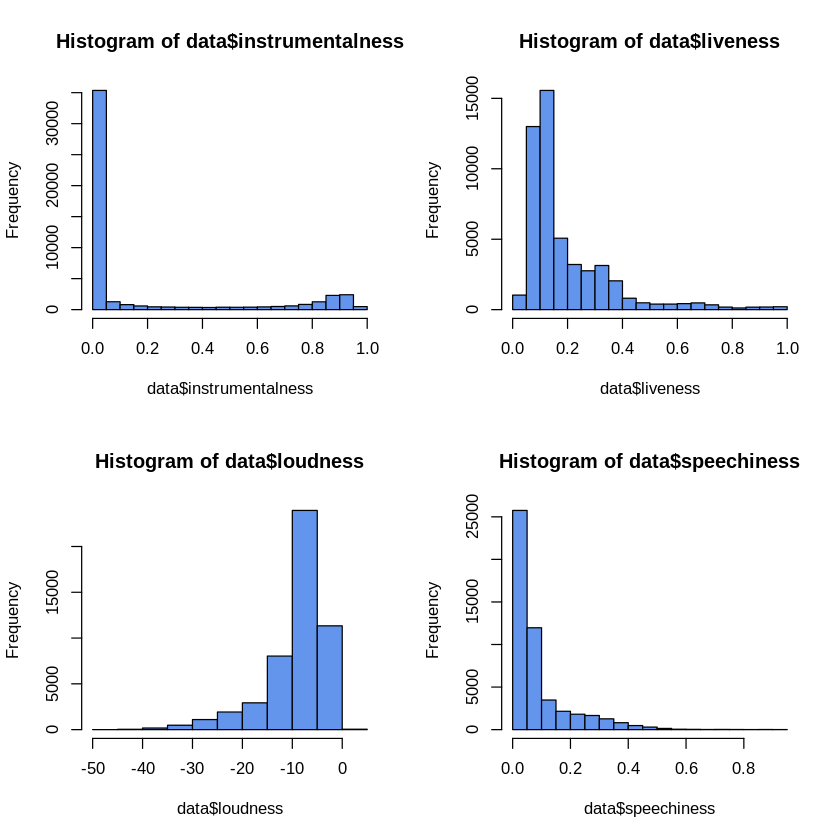

In [51]:
par(mfrow = c(2,2))
hist(data$instrumentalness, col = "cornflowerblue")
hist(data$liveness,col = "cornflowerblue")
hist(data$loudness, col = "cornflowerblue")
hist(data$speechiness, col = "cornflowerblue")

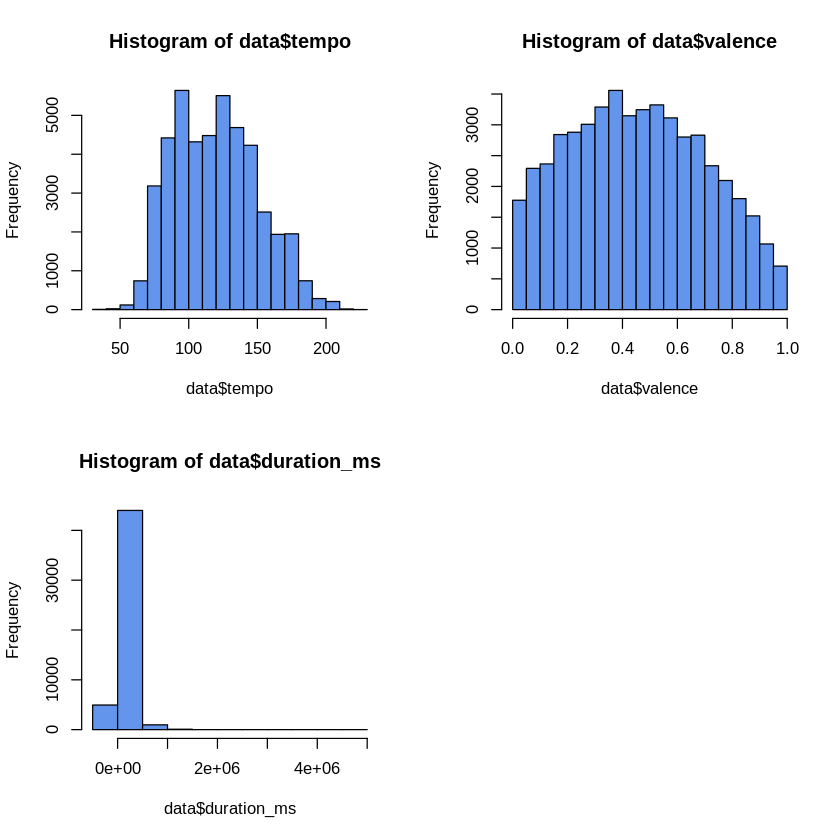

In [52]:
par(mfrow = c(2,2))
hist(data$tempo, col = "cornflowerblue")
hist(data$valence,col = "cornflowerblue")
hist(data$duration_ms, col = "cornflowerblue")

**Boxplots**

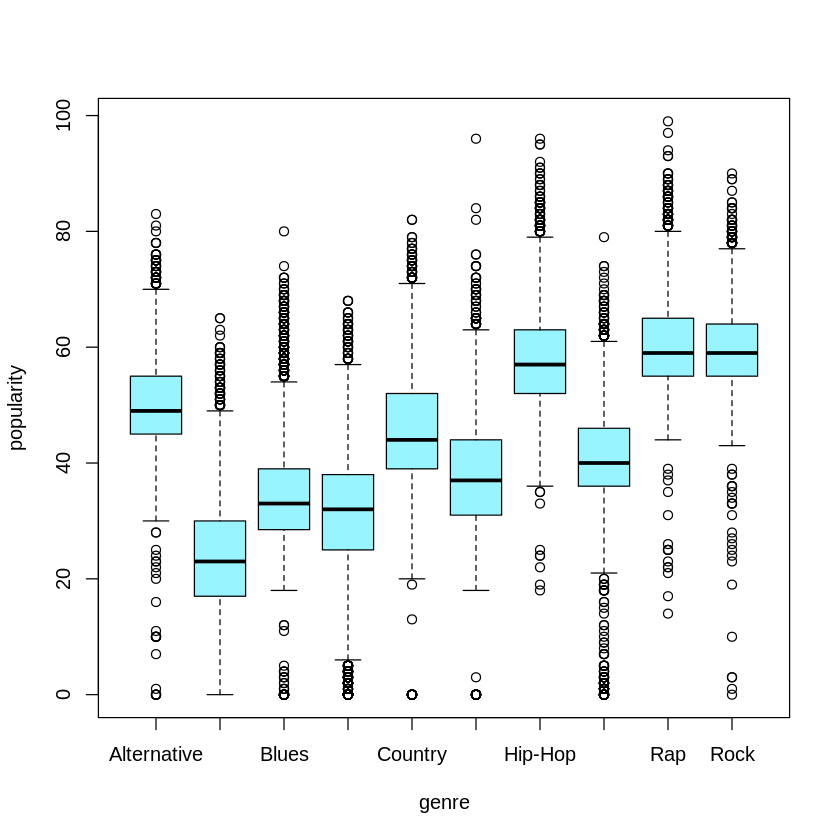

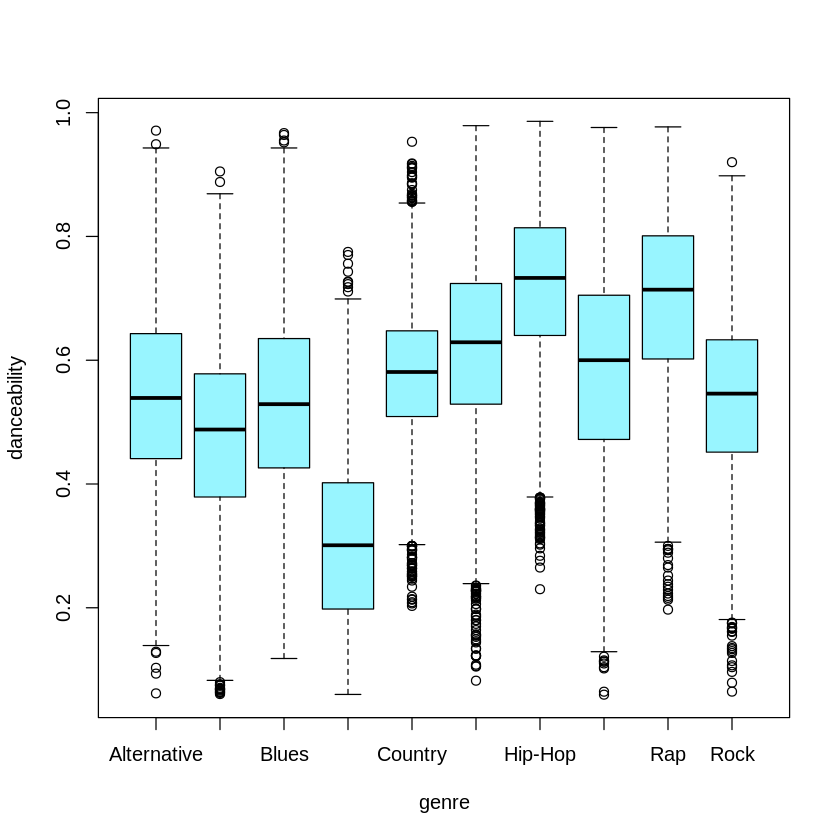

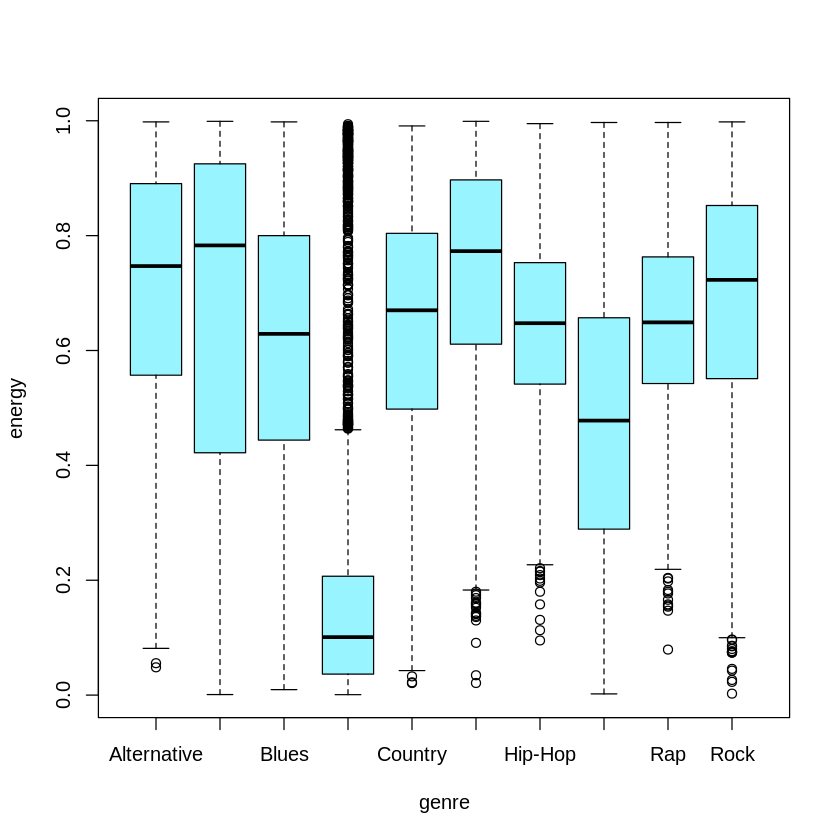

In [53]:
boxplot(data$popularity ~ data$music_genre,  
        xlab = "genre",
        ylab = "popularity",
        col = "cadetblue1")
boxplot(data$danceability ~ data$music_genre,  
        xlab = "genre",
        ylab = "danceability",
        col = "cadetblue1")
boxplot(data$energy ~ data$music_genre,  
        xlab = "genre",
        ylab = "energy",
        col = "cadetblue1")

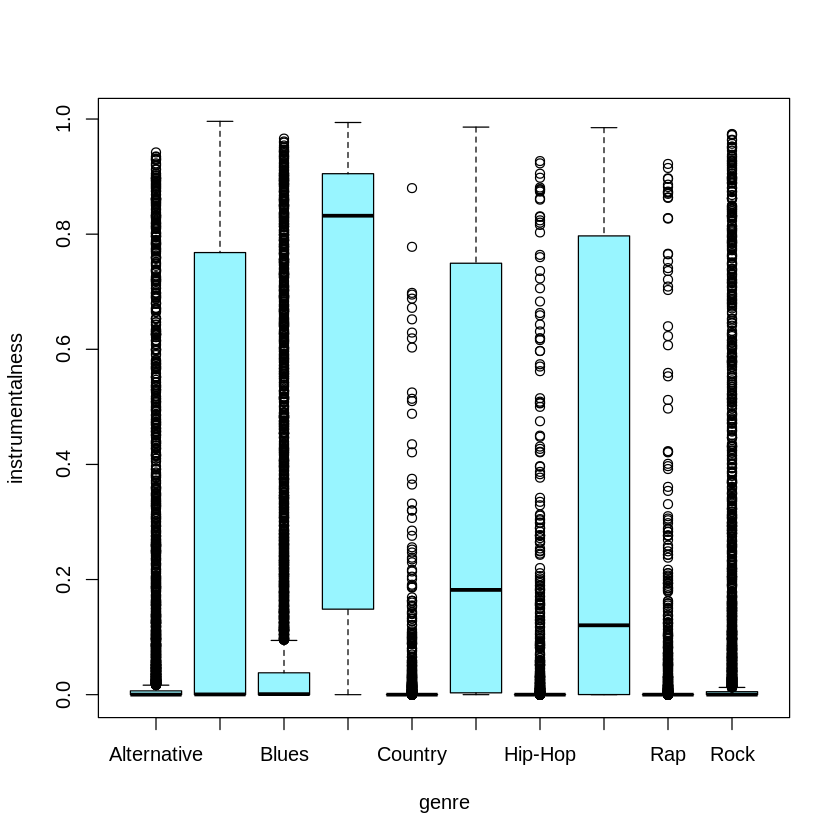

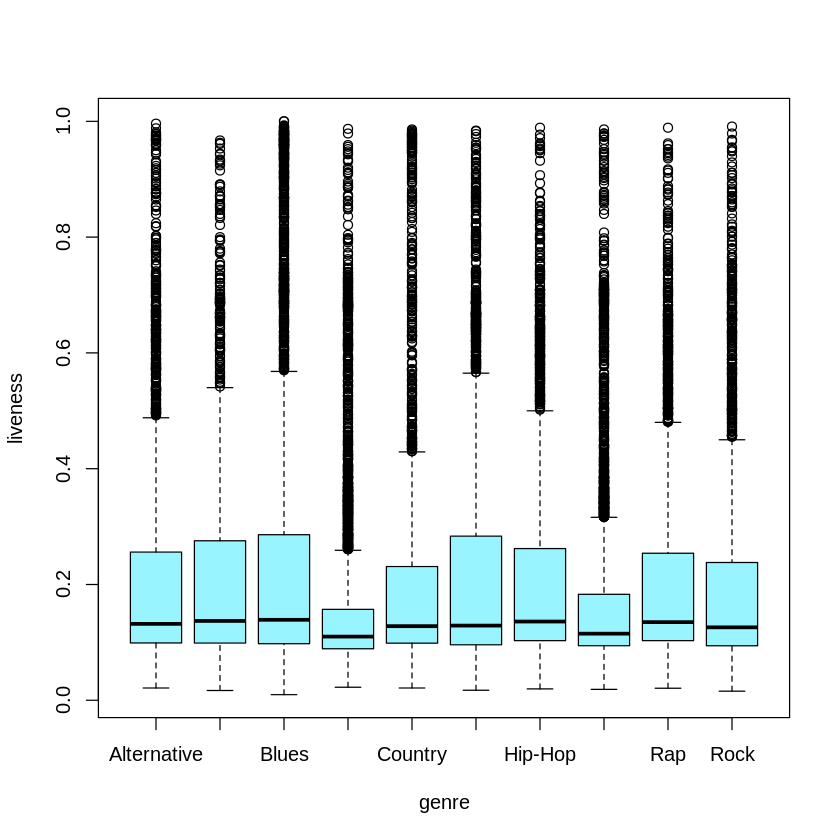

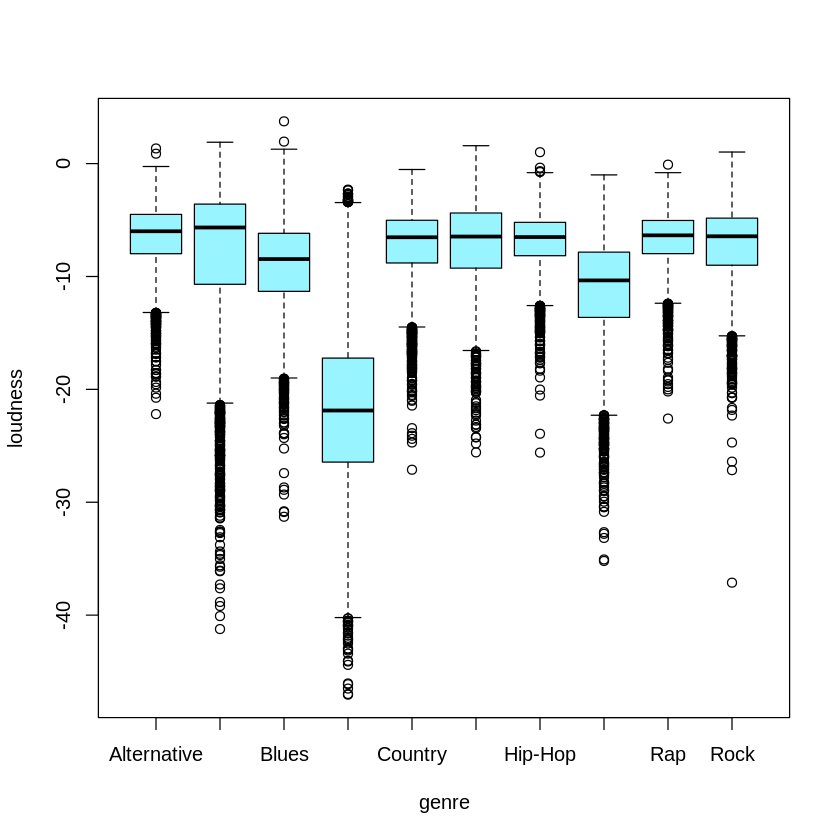

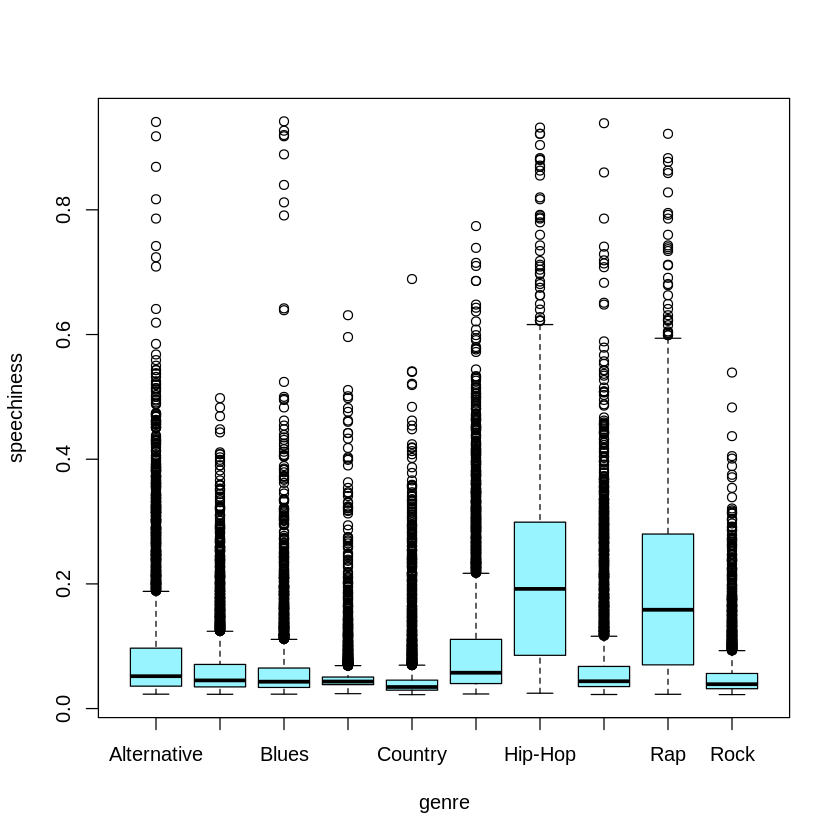

In [54]:
boxplot(data$instrumentalness ~ data$music_genre,  
        xlab = "genre",
        ylab = "instrumentalness",
        col = "cadetblue1")
boxplot(data$liveness ~ data$music_genre,  
        xlab = "genre",
        ylab = "liveness",
        col = "cadetblue1")
boxplot(data$loudness ~ data$music_genre,  
        xlab = "genre",
        ylab = "loudness",
        col = "cadetblue1")
boxplot(data$speechiness ~ data$music_genre,  
        xlab = "genre",
        ylab = "speechiness",
        col = "cadetblue1")

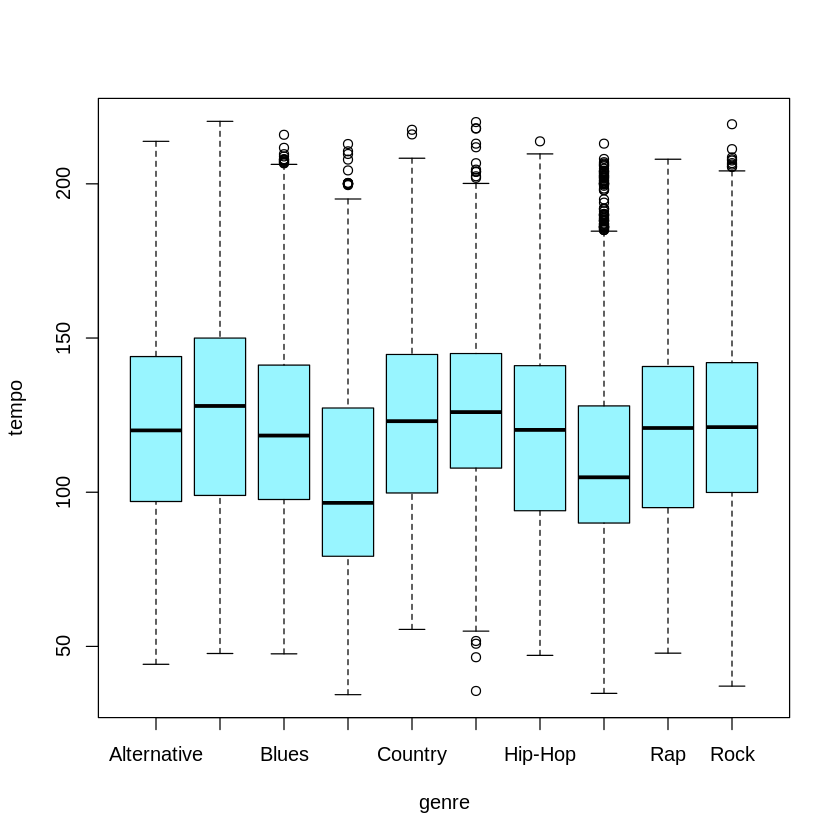

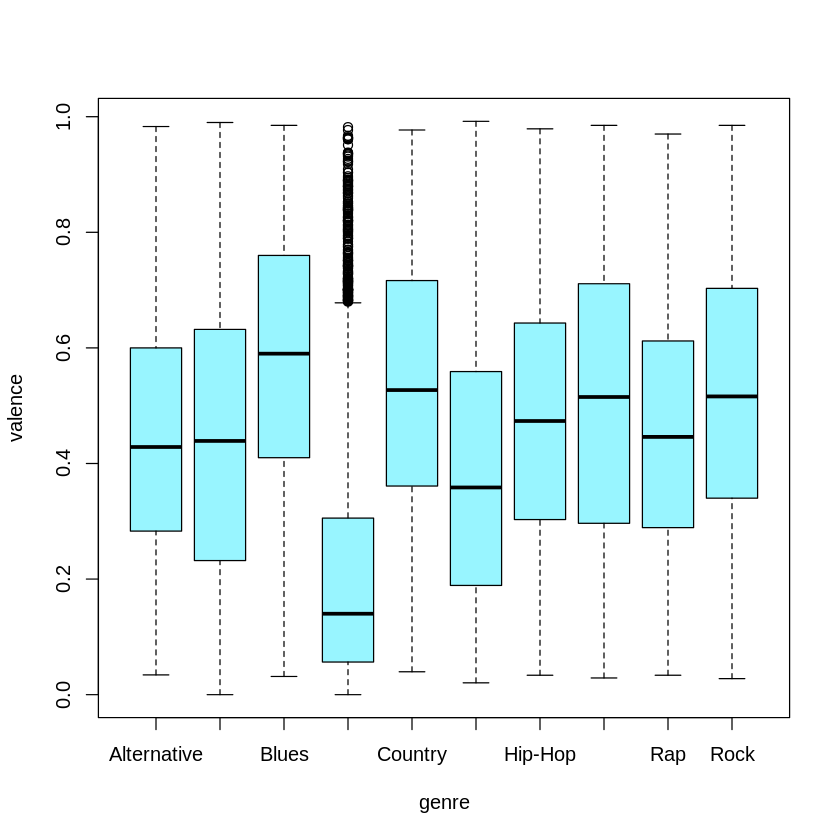

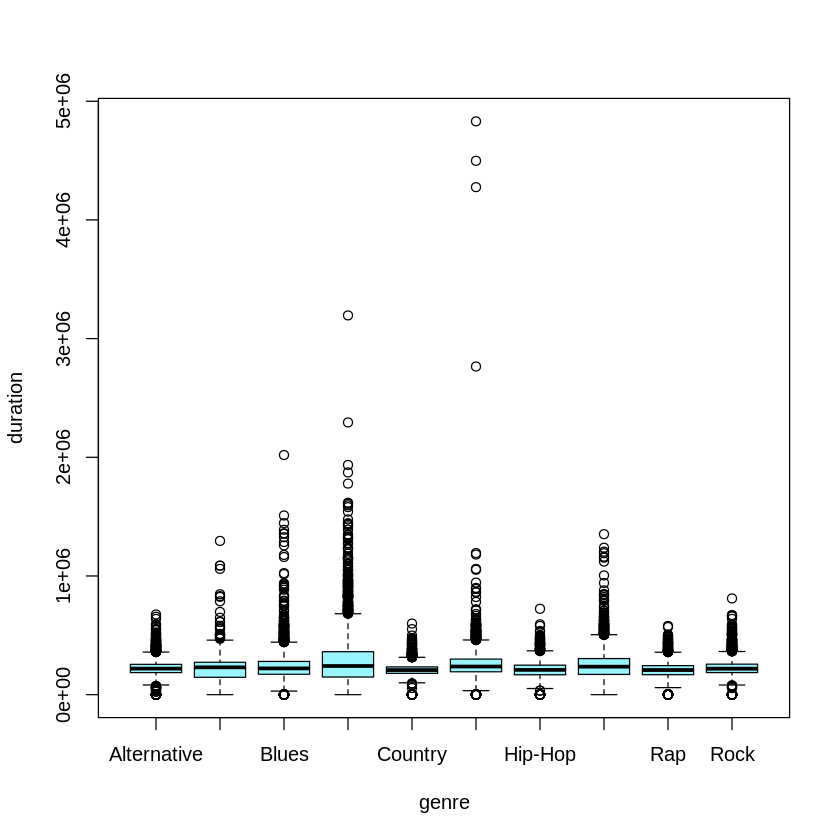

In [55]:
boxplot(data$tempo ~ data$music_genre,  
        xlab = "genre",
        ylab = "tempo",
        col = "cadetblue1")
boxplot(data$valence ~ data$music_genre,  
        xlab = "genre",
        ylab = "valence",
        col = "cadetblue1")
boxplot(data$duration_ms ~ data$music_genre,  
        xlab = "genre",
        ylab = "duration",
        col = "cadetblue1")

In [56]:
cols = select_if(data, is.numeric)
head(cols)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32894,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
2,46652,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531
3,30097,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
4,62177,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
5,24907,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323
6,89064,47,0.00523,0.755,519468,0.731,0.85400,0.216,-10.517,0.0412,NA,0.614


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(feature_names)` instead of `feature_names` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


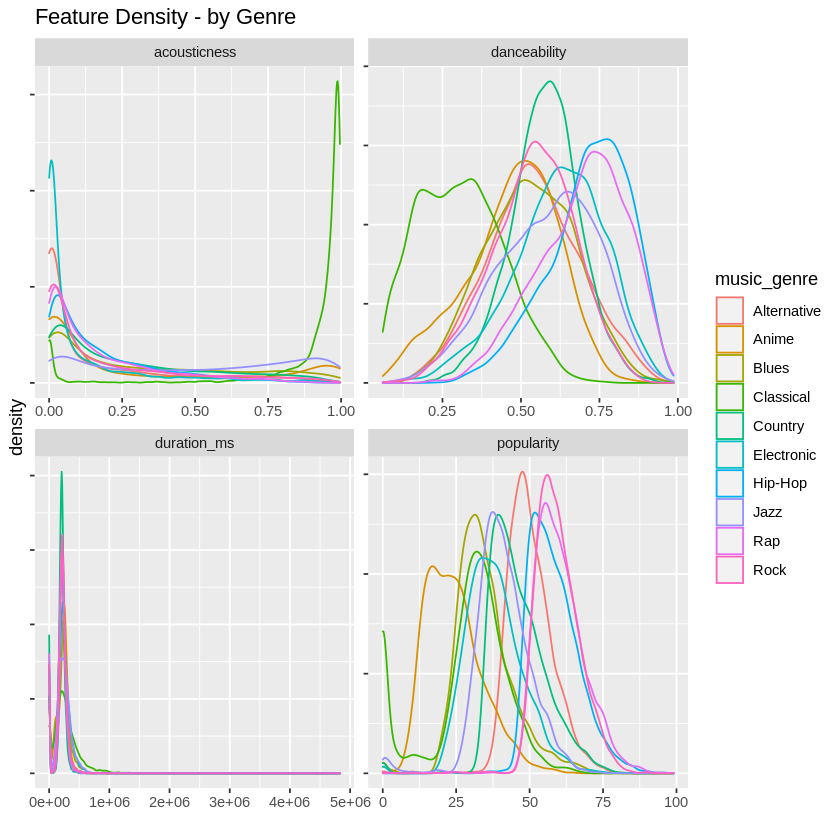

In [57]:
feature_names = names(cols)[2:5]

data %>%
  select(c('music_genre', feature_names)) %>%
  pivot_longer(cols = feature_names) %>%
  ggplot(aes(x = value)) +
  geom_density(aes(color = music_genre), alpha = 0.5) +
  facet_wrap(~name, ncol = 2, scales = 'free') +
  labs(title = 'Feature Density - by Genre',x = '', y = 'density') +
  theme(axis.text.y = element_blank()) 

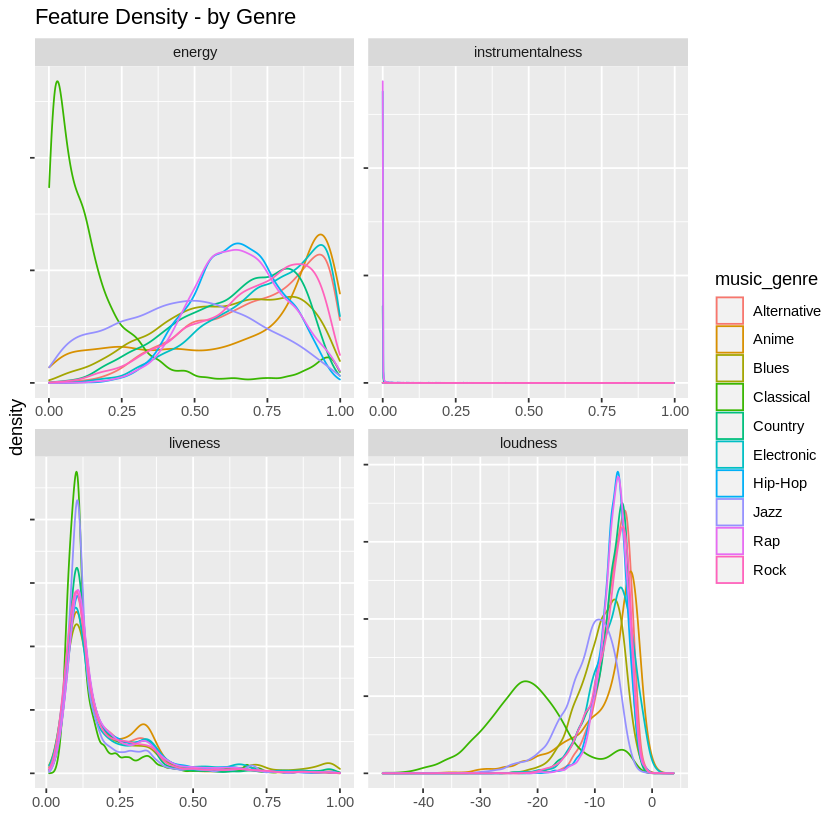

In [58]:
feature_names = names(cols)[6:9]

data %>%
  select(c('music_genre', feature_names)) %>%
  pivot_longer(cols = feature_names) %>%
  ggplot(aes(x = value)) +
  geom_density(aes(color = music_genre), alpha = 0.5) +
  facet_wrap(~name, ncol = 2, scales = 'free') +
  labs(title = 'Feature Density - by Genre',x = '', y = 'density') +
  theme(axis.text.y = element_blank()) 

Warning message:
“Removed 4980 rows containing non-finite values (stat_density).”


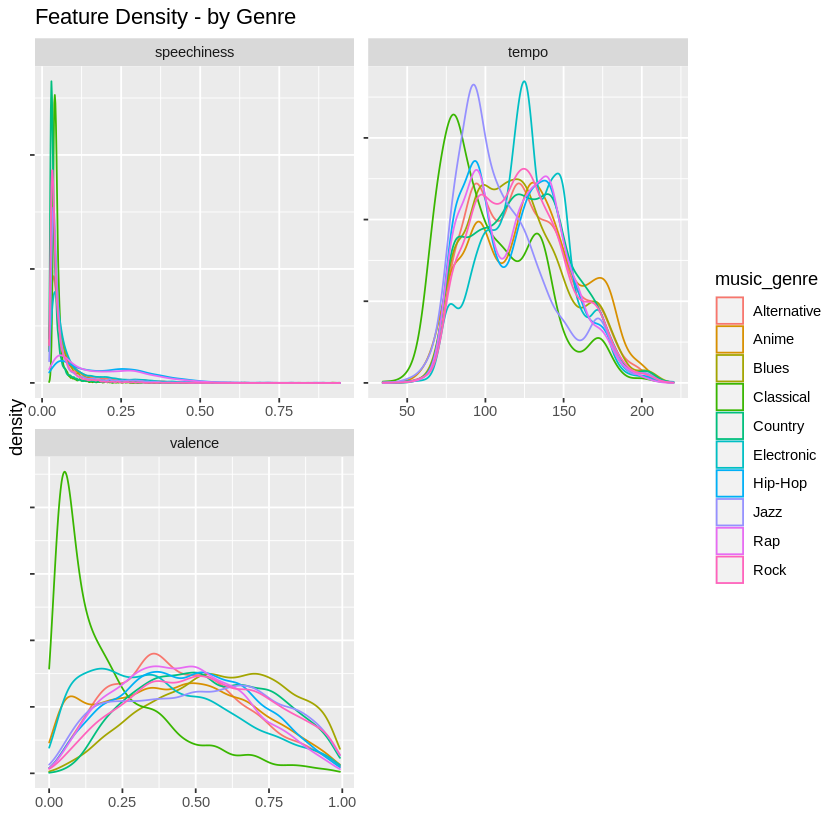

In [59]:
 feature_names = names(cols)[10:12]

data %>%
  select(c('music_genre', feature_names)) %>%
  pivot_longer(cols = feature_names) %>%
  ggplot(aes(x = value)) +
  geom_density(aes(color = music_genre), alpha = 0.5) +
  facet_wrap(~name, ncol = 2,scales = 'free') +
  labs(title = 'Feature Density - by Genre',x = '', y = 'density') +
  theme(axis.text.y = element_blank()) 
  

**Data Imputation**

In [60]:
data %>%
  group_by(music_genre) %>%
  summarise(mean_tempo = mean(tempo,na.rm=TRUE))

music_genre,mean_tempo
<chr>,<dbl>
Alternative,122.5472
Anime,126.8000
Blues,121.3800
Classical,104.0532
Country,123.7843
Electronic,125.9306
Hip-Hop,120.1541
Jazz,111.6994
Rap,120.5855


In [61]:
data %>%                 #count of NA by category
    group_by(music_genre) %>% 
    summarise((across(tempo,  ~sum(is.na(.)))))

music_genre,tempo
<chr>,<int>
Alternative,505
Anime,503
Blues,530
Classical,500
Country,514
Electronic,534
Hip-Hop,480
Jazz,479
Rap,496


In [62]:
imputed = data %>% 
            group_by(music_genre) %>% 
            mutate(tempo= ifelse(is.na(tempo),mean(tempo,na.rm = TRUE),tempo))

head(imputed)

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
32894,Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.8890,4-Apr,0.759,Electronic
46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.0020,4-Apr,0.531,Electronic
30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.9940,4-Apr,0.333,Electronic
62177,Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.0140,4-Apr,0.270,Electronic
24907,What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.0360,4-Apr,0.323,Electronic
89064,Axel Boman,Hello,47,0.00523,0.755,519468,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,125.9306,4-Apr,0.614,Electronic


In [63]:
imputed %>%
  group_by(music_genre) %>%
  summarise(mean_tempo = mean(tempo))

music_genre,mean_tempo
<chr>,<dbl>
Alternative,122.5472
Anime,126.8000
Blues,121.3800
Classical,104.0532
Country,123.7843
Electronic,125.9306
Hip-Hop,120.1541
Jazz,111.6994
Rap,120.5855


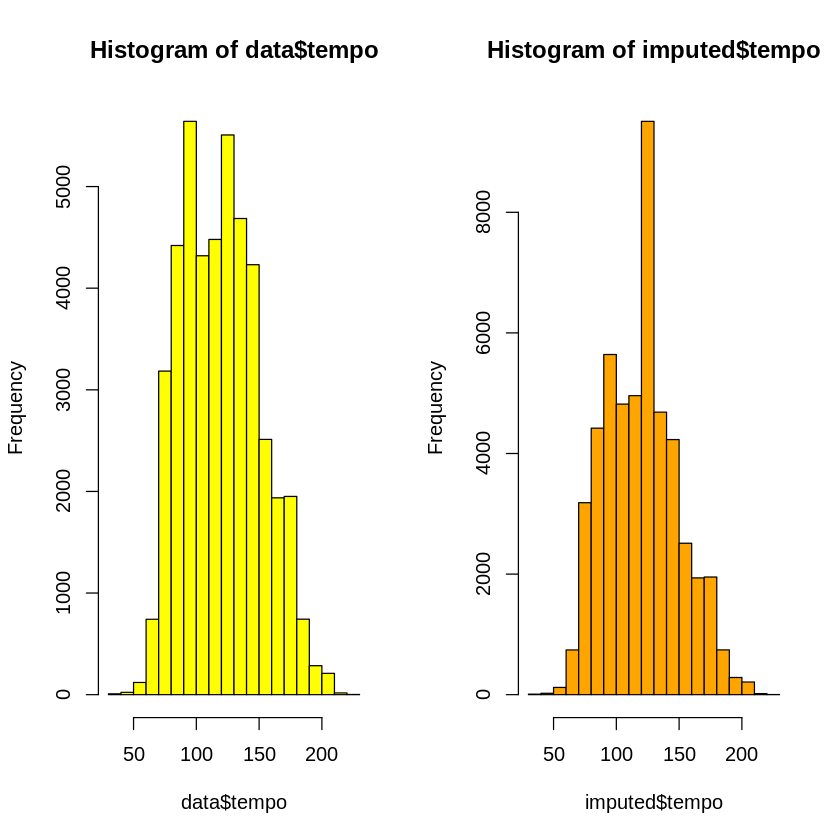

In [64]:
par(mfrow=c(1,2))
hist(data$tempo, col="yellow")
hist(imputed$tempo, col="orange")

**Removing Outliers**

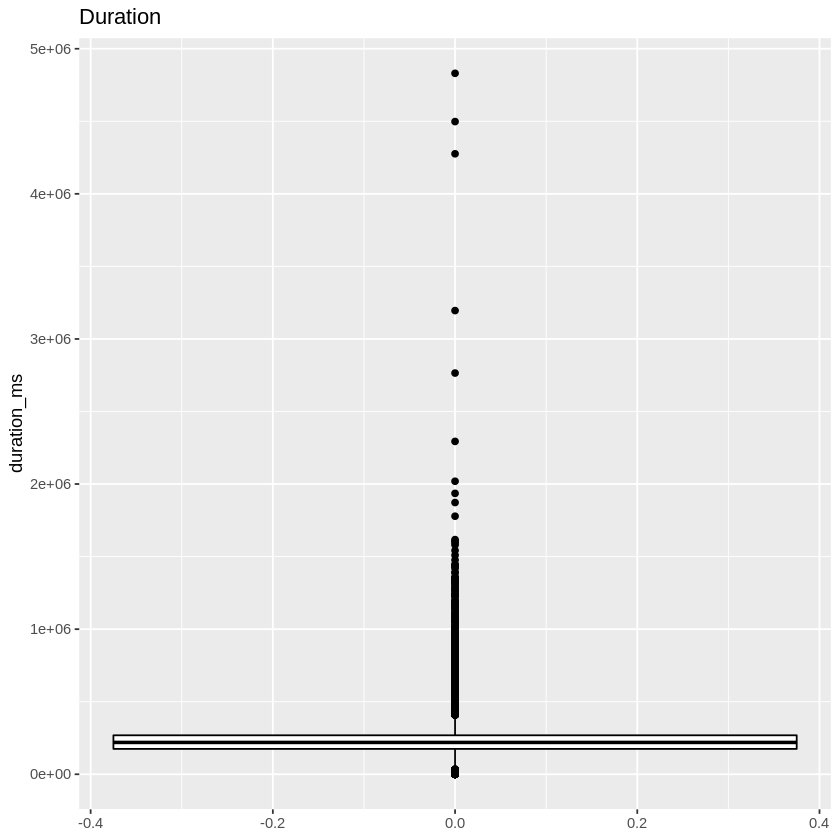

In [65]:
#keeping outliers in variables like speechiness, liveness, loudness as they represent natural variation (and they are within the prescribed range of values)
#removing outliers in duration as they seem erroneous
 
 imputed %>%
  ggplot(aes(y = duration_ms)) +
  geom_boxplot(color = "black") +
  labs(title = 'Duration') 

In [66]:
outliers = boxplot(imputed$duration_ms,plot=FALSE,range = 4)$out

In [67]:
lower = quantile(imputed$duration_ms, 0.025)
lower

2.5% 
  -1

In [68]:
no_outliers = imputed %>%
  filter(!duration_ms %in% outliers) 

In [69]:
no_outliers = no_outliers %>%
  filter(!duration_ms %in% lower) 

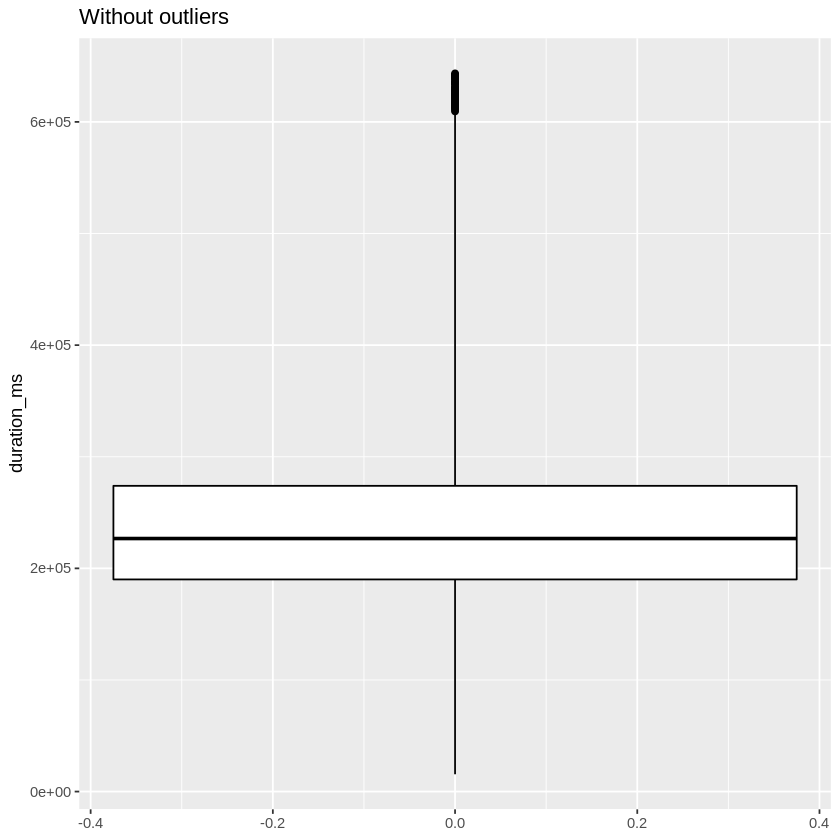

In [70]:
no_outliers %>%
  ggplot(aes(y = duration_ms)) +
  geom_boxplot(color = "black", coef = 4) +
  labs(title = 'Without outliers')

In [71]:
dim(no_outliers)


[1] 44668    18

In [72]:
 target_check = table(no_outliers$music_genre)  
 target_check


Alternative       Anime       Blues   Classical     Country  Electronic 
       4507        4517        4476        4212        4508        4496 
    Hip-Hop        Jazz         Rap        Rock 
       4509        4468        4488        4487 

In [ ]:
check_df = data.frame(label= c(names(target_check)), count= c(as.numeric(target_check)))

In [ ]:
ggplot(data=trgt_df, aes(x=label, y=count)) +
  geom_bar(stat="identity", fill="deeppink")+
  geom_text(aes(label=target_count), vjust=3, color="black", size=3)+
  theme_minimal()                                                             #not much class imbalance

**Encoding categorical features**

In [73]:
no_outliers$mode = as.factor(no_outliers$mode)
head(no_outliers$mode)

[1] Minor Major Major Major Minor Major
Levels: Major Minor

In [74]:
no_outliers$key = as.factor(no_outliers$key)
head(no_outliers$key)

[1] D  G# C# F# D  B 
Levels: A A# B C C# D D# E F F# G G#

In [75]:
encoded_data = one_hot(as.data.table(no_outliers))
head(encoded_data)

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_A,⋯,key_G#,liveness,loudness,mode_Major,mode_Minor,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,9.50e-01,0,⋯,0,0.124,-7.043,0,1,0.0300,115.0020,4-Apr,0.531,Electronic
30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,1.18e-02,0,⋯,1,0.534,-4.617,1,0,0.0345,127.9940,4-Apr,0.333,Electronic
62177,Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,2.53e-03,0,⋯,0,0.157,-4.498,1,0,0.2390,128.0140,4-Apr,0.270,Electronic
24907,What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,9.09e-01,0,⋯,0,0.157,-6.266,1,0,0.0413,145.0360,4-Apr,0.323,Electronic
89064,Axel Boman,Hello,47,0.00523,0.755,519468,0.731,8.54e-01,0,⋯,0,0.216,-10.517,0,1,0.0412,125.9306,4-Apr,0.614,Electronic
43760,Jordan Comolli,Clash,46,0.02890,0.572,214408,0.803,7.74e-06,0,⋯,0,0.106,-4.294,1,0,0.3510,149.9950,4-Apr,0.230,Electronic


**Correlation of features**

In [76]:
numeric_col = select_if(encoded_data, is.numeric)
features = names(numeric_col)
head(numeric_col)

instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_A,key_A#,key_B,⋯,key_F#,key_G,key_G#,liveness,loudness,mode_Major,mode_Minor,speechiness,tempo,valence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
46652,31,0.01270,0.622,218293,0.890,9.50e-01,0,0,0,⋯,0,0,0,0.124,-7.043,0,1,0.0300,115.0020,0.531
30097,28,0.00306,0.620,215613,0.755,1.18e-02,0,0,0,⋯,0,0,1,0.534,-4.617,1,0,0.0345,127.9940,0.333
62177,34,0.02540,0.774,166875,0.700,2.53e-03,0,0,0,⋯,0,0,0,0.157,-4.498,1,0,0.2390,128.0140,0.270
24907,32,0.00465,0.638,222369,0.587,9.09e-01,0,0,0,⋯,1,0,0,0.157,-6.266,1,0,0.0413,145.0360,0.323
89064,47,0.00523,0.755,519468,0.731,8.54e-01,0,0,0,⋯,0,0,0,0.216,-10.517,0,1,0.0412,125.9306,0.614
43760,46,0.02890,0.572,214408,0.803,7.74e-06,0,0,1,⋯,0,0,0,0.106,-4.294,1,0,0.3510,149.9950,0.230


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(features)` instead of `features` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


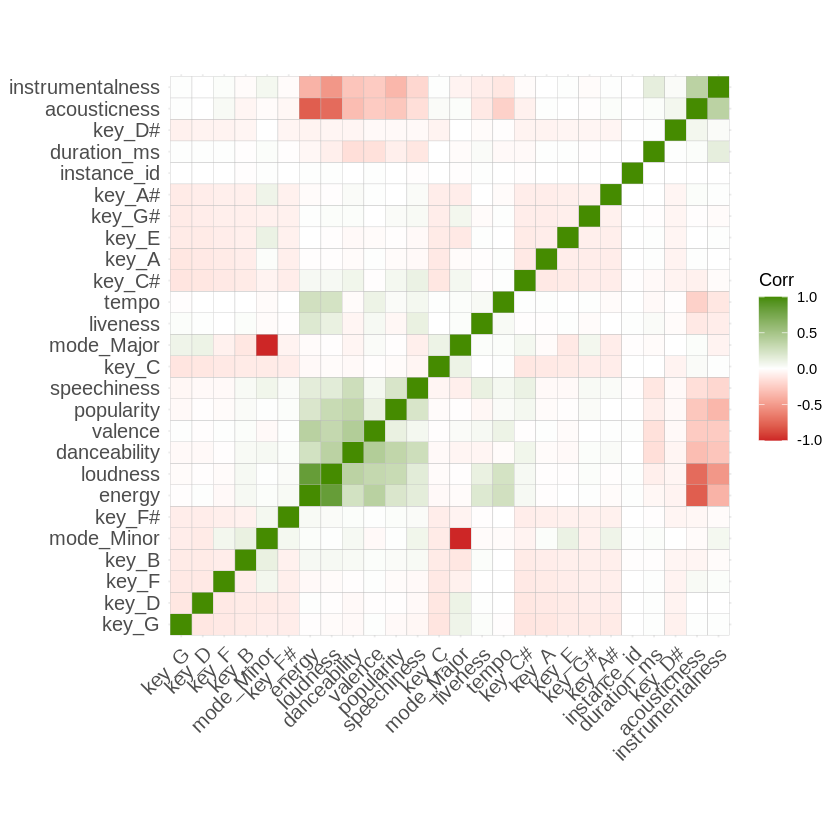

In [77]:
corr_data = select(numeric_col, features)
correlation_matrix = round(cor(corr_data), 2)
ggcorrplot(correlation_matrix, hc.order = TRUE, colors = c("firebrick3", "white", "chartreuse4"))


In [78]:
genre_mat = encoded_data %>%
    group_by(music_genre) %>%
    summarise_if(is.numeric, median) %>%
    ungroup()
genre_mat

music_genre,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_A,key_A#,⋯,key_F#,key_G,key_G#,liveness,loudness,mode_Major,mode_Minor,speechiness,tempo,valence
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alternative,56129.0,49,0.03360,0.5390,225573.0,0.74800,0.0000670,0,0,⋯,0,0,0,0.1320,-5.9810,1,0,0.0520,122.5472,0.429
Anime,55771.0,23,0.06420,0.4890,238560.0,0.78300,0.0003630,0,0,⋯,0,0,0,0.1370,-5.6630,1,0,0.0450,126.8000,0.437
Blues,56327.5,33,0.21350,0.5315,229086.5,0.62900,0.0008965,0,0,⋯,0,0,0,0.1375,-8.3955,1,0,0.0430,121.3800,0.591
Classical,55642.0,32,0.96900,0.3090,251548.5,0.09925,0.8350000,0,0,⋯,0,0,0,0.1100,-21.9695,1,0,0.0436,102.7685,0.148
Country,56447.5,44,0.18300,0.5795,211626.5,0.66900,0.0000000,0,0,⋯,0,0,0,0.1280,-6.5445,1,0,0.0346,123.7843,0.527
Electronic,56131.5,37,0.02600,0.6300,244966.0,0.77300,0.1790000,0,0,⋯,0,0,0,0.1290,-6.4360,1,0,0.0578,125.9306,0.362
Hip-Hop,56134.0,57,0.10900,0.7320,215213.0,0.65100,0.0000000,0,0,⋯,0,0,0,0.1360,-6.4760,1,0,0.1910,120.1541,0.477
Jazz,55453.0,40,0.51050,0.6010,247287.0,0.47700,0.1150000,0,0,⋯,0,0,0,0.1150,-10.3285,1,0,0.0436,109.0670,0.515
Rap,55227.0,59,0.09405,0.7130,214447.0,0.65000,0.0000000,0,0,⋯,0,0,0,0.1350,-6.3450,1,0,0.1600,120.5855,0.448


In [79]:
feat=names(encoded_data)[c(4:7, 9,22:23,26:27,29)]    #dropped energy high correlation with loudness
feat

[1] "popularity"       "acousticness"     "danceability"     "duration_ms"     
 [5] "instrumentalness" "liveness"         "loudness"         "speechiness"     
 [9] "tempo"            "valence"

In [80]:
genre_cor = genre_mat %>%
 select(feat) %>%
 scale() %>%
 t() %>%
 as.matrix()

genre_cor

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(feat)` instead of `feat` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


popularity,0.4553771,-1.62178148,-0.82287435,-0.9027651,0.05592350,-0.50331149,1.09450277,-0.263639354,1.25428420,1.2542842
acousticness,-0.6519693,-0.54893378,-0.04621448,2.4976866,-0.14891333,-0.67755988,-0.39808432,0.953836627,-0.44842359,-0.5314245
danceability,-0.2347885,-0.65256169,-0.29745450,-2.1565451,0.10360775,0.52555865,1.37781591,0.283250208,1.21906210,-0.1679448
duration_ms,-0.3297897,0.56416443,-0.08793956,1.4582218,-1.28979060,1.00511849,-1.04291553,1.164883449,-1.09564279,-0.3463100
instrumentalness,-0.4322616,-0.43112903,-0.42908768,2.7624736,-0.43251799,0.25239638,-0.43251799,0.007510794,-0.43251799,-0.4323485
liveness,0.3670247,0.89894465,0.95213664,-1.9734229,-0.05851119,0.04787279,0.79256067,-1.441502957,0.68617668,-0.2712792
loudness,0.5011169,0.56541196,0.01293988,-2.7315271,0.38718538,0.40912251,0.40103509,-0.377884841,0.42752140,0.4050788
speechiness,-0.3393499,-0.46450532,-0.50026400,-0.4895364,-0.65045048,-0.23564973,2.14587867,-0.489536394,1.59161906,-0.5682055
tempo,0.3895350,0.94570752,0.23687919,-2.1971229,0.55131610,0.83200669,0.07656574,-1.373406725,0.13297987,0.4055396
valence,-0.1324100,-0.06702236,1.19169025,-2.4291519,0.66858891,-0.68003175,0.25991598,0.570507404,0.02288568,0.5950278


In [81]:
genre_cor = genre_mat %>%
 select(feat) %>%
 scale() %>%
 t() %>%
 as.matrix() %>%
 cor()

genre_cor

1.0000000,0.28245601,0.16854169,-0.7317964,0.52729210,0.1730359,0.2457440,-0.7086857,0.3728833,0.71344873
0.2824560,1.00000000,0.63293428,-0.2815048,0.05992388,0.5780862,-0.3578256,-0.3576670,-0.3921795,-0.23026503
0.1685417,0.63293428,1.00000000,-0.4174032,0.43088354,-0.1074947,-0.2013689,-0.1546345,-0.2526394,0.02560069
-0.7317964,-0.28150483,-0.41740316,1.0000000,-0.68468878,-0.0760709,-0.5280928,0.5310530,-0.5642638,-0.54451846
0.5272921,0.05992388,0.43088354,-0.6846888,1.00000000,-0.2729685,0.2114602,-0.3901949,0.2858760,0.61112590
0.1730359,0.57808622,-0.10749474,-0.0760709,-0.27296846,1.0000000,-0.2960575,-0.1522324,-0.2733573,-0.19098005
0.2457440,-0.35782557,-0.20136892,-0.5280928,0.21146016,-0.2960575,1.0000000,-0.4477178,0.9810838,0.12960077
-0.7086857,-0.35766704,-0.15463453,0.5310530,-0.39019492,-0.1522324,-0.4477178,1.0000000,-0.5055639,-0.20110847
0.3728833,-0.39217947,-0.25263941,-0.5642638,0.28587602,-0.2733573,0.9810838,-0.5055639,1.0000000,0.25816320
0.7134487,-0.23026503,0.02560069,-0.5445185,0.61112590,-0.1909800,0.1296008,-0.2011085,0.2581632,1.00000000


In [82]:
colnames(genre_cor) = genre_mat$music_genre
row.names(genre_cor) = genre_mat$music_genre
colnames(genre_cor)
row.names(genre_cor)

[1] "Alternative" "Anime"       "Blues"       "Classical"   "Country"    
 [6] "Electronic"  "Hip-Hop"     "Jazz"        "Rap"         "Rock"

[1] "Alternative" "Anime"       "Blues"       "Classical"   "Country"    
 [6] "Electronic"  "Hip-Hop"     "Jazz"        "Rap"         "Rock"

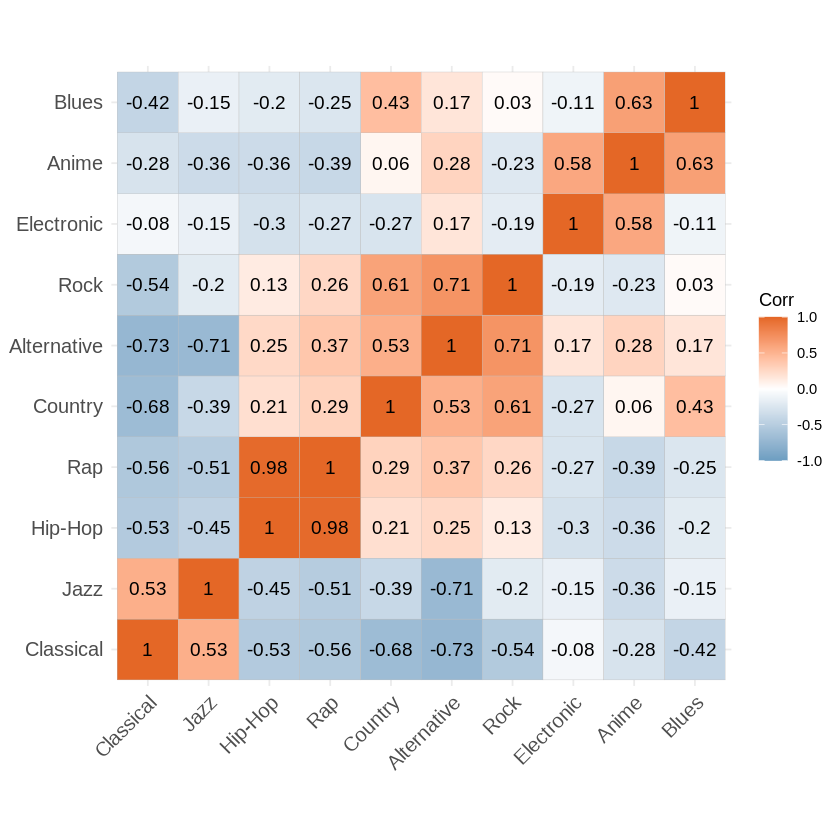

In [83]:
ggcorrplot(genre_cor, hc.order = TRUE, lab = TRUE, colors = c("#6D9EC1", "white", "#E46726"))

**Scaling Data**

In [84]:
head(encoded_data)

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_A,⋯,key_G#,liveness,loudness,mode_Major,mode_Minor,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,9.50e-01,0,⋯,0,0.124,-7.043,0,1,0.0300,115.0020,4-Apr,0.531,Electronic
30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,1.18e-02,0,⋯,1,0.534,-4.617,1,0,0.0345,127.9940,4-Apr,0.333,Electronic
62177,Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,2.53e-03,0,⋯,0,0.157,-4.498,1,0,0.2390,128.0140,4-Apr,0.270,Electronic
24907,What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,9.09e-01,0,⋯,0,0.157,-6.266,1,0,0.0413,145.0360,4-Apr,0.323,Electronic
89064,Axel Boman,Hello,47,0.00523,0.755,519468,0.731,8.54e-01,0,⋯,0,0.216,-10.517,0,1,0.0412,125.9306,4-Apr,0.614,Electronic
43760,Jordan Comolli,Clash,46,0.02890,0.572,214408,0.803,7.74e-06,0,⋯,0,0.106,-4.294,1,0,0.3510,149.9950,4-Apr,0.230,Electronic


In [85]:
scaled_data = encoded_data %>%
   mutate_at(c(4:9,22:23,26:27,29), list(~c(scale(.))))

head(scaled_data)

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_A,⋯,key_G#,liveness,loudness,mode_Major,mode_Minor,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
46652,Thievery Corporation,The Shining Path,-0.8620880,-0.8545075,0.34696392,-0.2575814,1.09107118,2.3928336,0,⋯,0,-0.4333897,0.3287244,0,1,-0.6285765,-0.1719359,4-Apr,0.2911733,Electronic
30097,Dillon Francis,Hurricane,-1.0556701,-0.8829633,0.33565847,-0.2901090,0.57717063,-0.5137700,0,⋯,1,2.1164068,0.7267707,1,0,-0.5843629,0.2738172,4-Apr,-0.5134954,Electronic
62177,Dubloadz,Nitro,-0.6685058,-0.8170190,1.20617823,-0.8816497,0.36780374,-0.5424890,0,⋯,0,-0.2281622,0.7462956,1,0,1.4249000,0.2745034,4-Apr,-0.7695263,Electronic
24907,What So Not,Divide & Conquer,-0.7975606,-0.8782699,0.43740753,-0.2081104,-0.06235005,2.2658130,0,⋯,0,-0.2281622,0.4562108,1,0,-0.5175512,0.8585250,4-Apr,-0.5541352,Electronic
89064,Axel Boman,Hello,0.1703501,-0.8765578,1.09877644,3.3978266,0.48581053,2.0954195,0,⋯,0,0.1387598,-0.2412726,0,1,-0.5185337,0.2030213,4-Apr,0.6284839,Electronic
43760,Jordan Comolli,Clash,0.1058227,-0.8066875,0.06432763,-0.3047343,0.75989083,-0.5503031,0,⋯,0,-0.5453320,0.7797669,1,0,2.5253277,1.0286674,4-Apr,-0.9320857,Electronic


**Correlation with Chi-Squared (between 2 categorical variables)**

In [86]:
chisq.test(table(no_outliers$mode, no_outliers$music_genre)) 


	Pearson's Chi-squared test

data:  table(no_outliers$mode, no_outliers$music_genre)
X-squared = 2090.3, df = 9, p-value < 2.2e-16


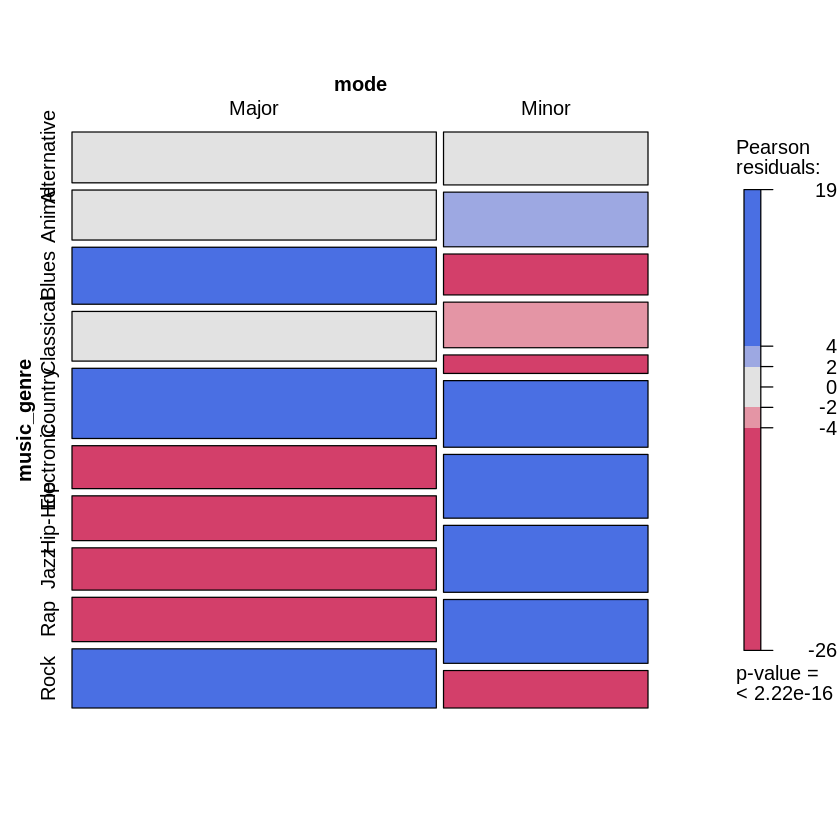

In [88]:
mosaic(~ mode + music_genre,
  direction = c("v", "h"),
  data = no_outliers,
  shade = TRUE
)

In [87]:
chisq.test(table(no_outliers$key, no_outliers$music_genre)) 


	Pearson's Chi-squared test

data:  table(no_outliers$key, no_outliers$music_genre)
X-squared = 2192, df = 99, p-value < 2.2e-16


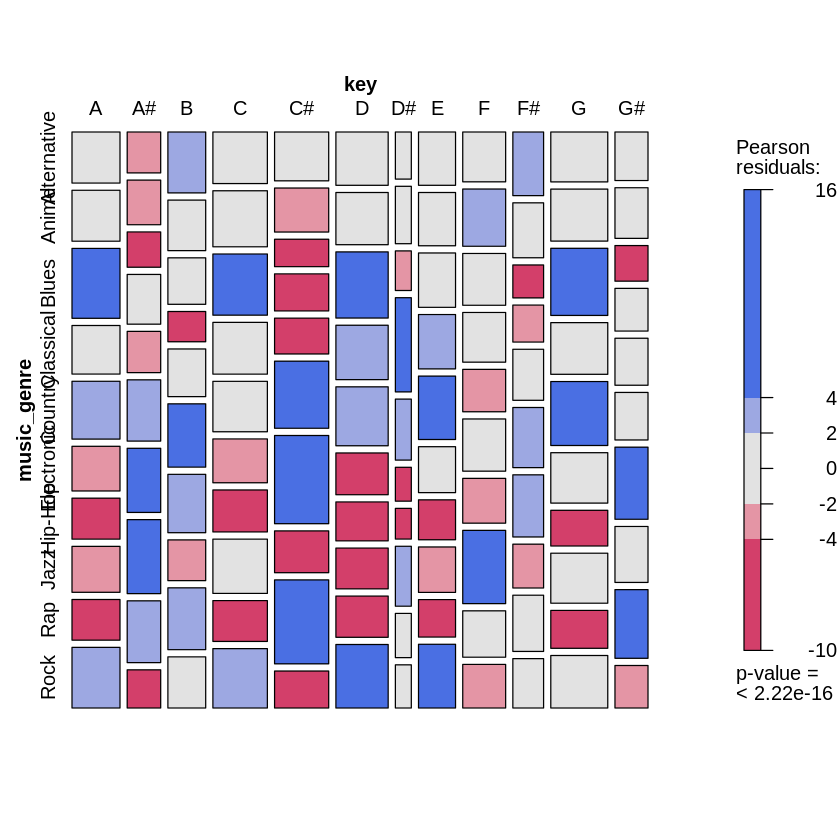

In [89]:
mosaic(~ key + music_genre,
  direction = c("v", "h"),
  data = no_outliers,
  shade = TRUE
)

**Significant Feature Selection**

In [90]:
map = c('Alternative'=1,'Anime'=2,'Blues'=3,'Classical'=4,'Country'=5,'Electronic'=6,'Hip-Hop'=7,'Jazz'=8,'Rap'=9,'Rock'=10)

In [91]:
scaled_data$music_genre = map[scaled_data$music_genre]
head(scaled_data)

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_A,⋯,key_G#,liveness,loudness,mode_Major,mode_Minor,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46652,Thievery Corporation,The Shining Path,-0.8620880,-0.8545075,0.34696392,-0.2575814,1.09107118,2.3928336,0,⋯,0,-0.4333897,0.3287244,0,1,-0.6285765,-0.1719359,4-Apr,0.2911733,6
30097,Dillon Francis,Hurricane,-1.0556701,-0.8829633,0.33565847,-0.2901090,0.57717063,-0.5137700,0,⋯,1,2.1164068,0.7267707,1,0,-0.5843629,0.2738172,4-Apr,-0.5134954,6
62177,Dubloadz,Nitro,-0.6685058,-0.8170190,1.20617823,-0.8816497,0.36780374,-0.5424890,0,⋯,0,-0.2281622,0.7462956,1,0,1.4249000,0.2745034,4-Apr,-0.7695263,6
24907,What So Not,Divide & Conquer,-0.7975606,-0.8782699,0.43740753,-0.2081104,-0.06235005,2.2658130,0,⋯,0,-0.2281622,0.4562108,1,0,-0.5175512,0.8585250,4-Apr,-0.5541352,6
89064,Axel Boman,Hello,0.1703501,-0.8765578,1.09877644,3.3978266,0.48581053,2.0954195,0,⋯,0,0.1387598,-0.2412726,0,1,-0.5185337,0.2030213,4-Apr,0.6284839,6
43760,Jordan Comolli,Clash,0.1058227,-0.8066875,0.06432763,-0.3047343,0.75989083,-0.5503031,0,⋯,0,-0.5453320,0.7797669,1,0,2.5253277,1.0286674,4-Apr,-0.9320857,6


In [92]:
target_genre = scaled_data$music_genre
head(target_genre)

[1] 6 6 6 6 6 6

In [93]:
var_data = select(scaled_data,c(1:29))
head(var_data)

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_A,⋯,key_G,key_G#,liveness,loudness,mode_Major,mode_Minor,speechiness,tempo,obtained_date,valence
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
46652,Thievery Corporation,The Shining Path,-0.8620880,-0.8545075,0.34696392,-0.2575814,1.09107118,2.3928336,0,⋯,0,0,-0.4333897,0.3287244,0,1,-0.6285765,-0.1719359,4-Apr,0.2911733
30097,Dillon Francis,Hurricane,-1.0556701,-0.8829633,0.33565847,-0.2901090,0.57717063,-0.5137700,0,⋯,0,1,2.1164068,0.7267707,1,0,-0.5843629,0.2738172,4-Apr,-0.5134954
62177,Dubloadz,Nitro,-0.6685058,-0.8170190,1.20617823,-0.8816497,0.36780374,-0.5424890,0,⋯,0,0,-0.2281622,0.7462956,1,0,1.4249000,0.2745034,4-Apr,-0.7695263
24907,What So Not,Divide & Conquer,-0.7975606,-0.8782699,0.43740753,-0.2081104,-0.06235005,2.2658130,0,⋯,0,0,-0.2281622,0.4562108,1,0,-0.5175512,0.8585250,4-Apr,-0.5541352
89064,Axel Boman,Hello,0.1703501,-0.8765578,1.09877644,3.3978266,0.48581053,2.0954195,0,⋯,0,0,0.1387598,-0.2412726,0,1,-0.5185337,0.2030213,4-Apr,0.6284839
43760,Jordan Comolli,Clash,0.1058227,-0.8066875,0.06432763,-0.3047343,0.75989083,-0.5503031,0,⋯,0,0,-0.5453320,0.7797669,1,0,2.5253277,1.0286674,4-Apr,-0.9320857


In [94]:
names(var_data) <- make.names(names(var_data))

In [95]:
rf = randomForest(target_genre ~ ., data = var_data)
imp = importance(rf)
imp

,IncNodePurity
instance_id,15548.4819
artist_name,15268.0101
track_name,17611.9646
popularity,105769.0377
acousticness,18247.8024
danceability,30374.5863
duration_ms,15422.7991
energy,17340.8155
instrumentalness,18028.8324
key_A,1121.6760


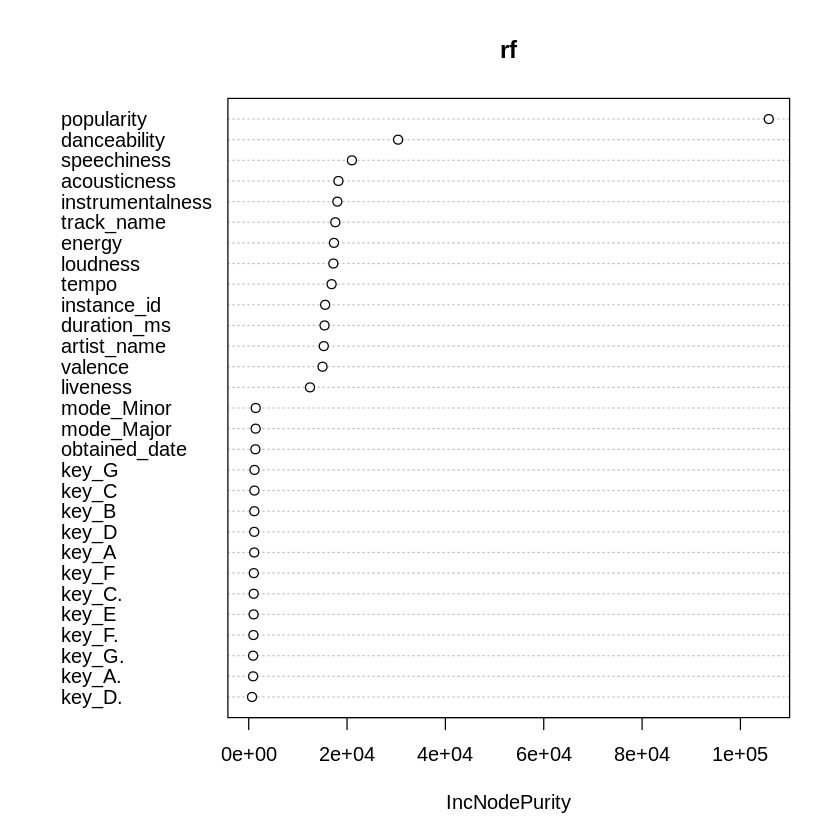

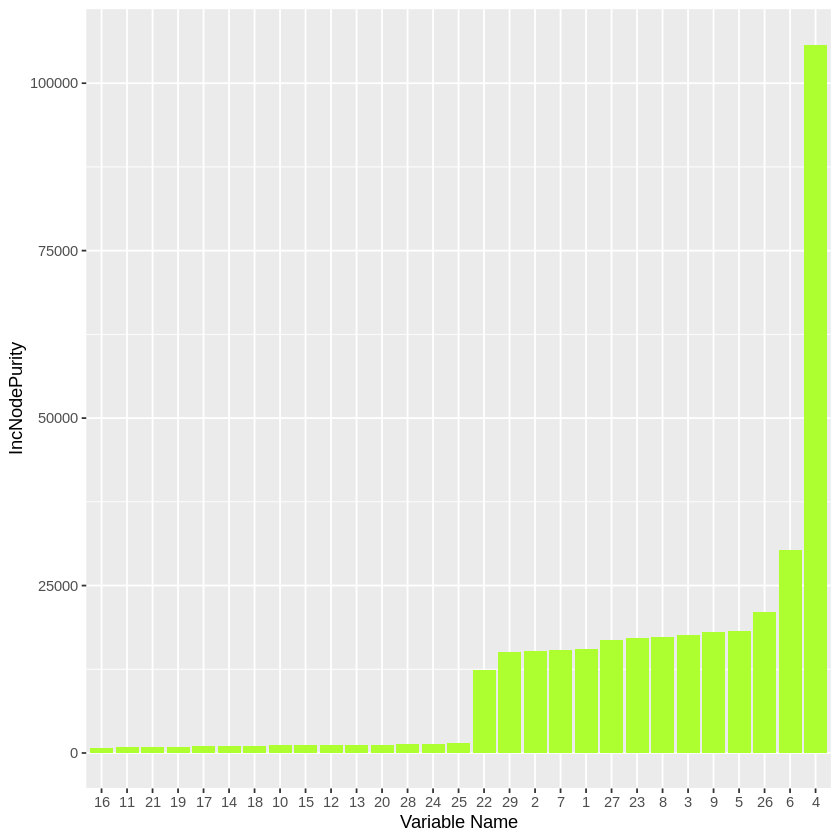

In [111]:
rf_imp = varImpPlot(rf) 

imp = as.data.frame(imp)
imp$varnames = rownames(imp)
rownames(imp) = NULL  

ggplot(imp, aes(x=reorder(varnames, IncNodePurity), weight=IncNodePurity)) + 
  geom_bar(fill="greenyellow") +
  ylab("IncNodePurity") +
  xlab("Variable Name")